## El método del codo y el factor de la silueta del Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

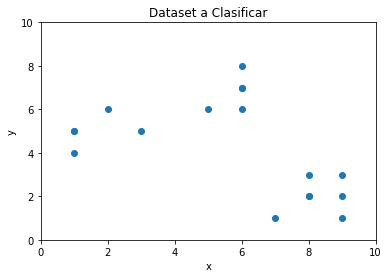

In [3]:
plt.plot()
plt.title("Dataset a Clasificar")
plt.xlim([0,10])
plt.ylim([0,10])
plt.scatter(x1,x2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

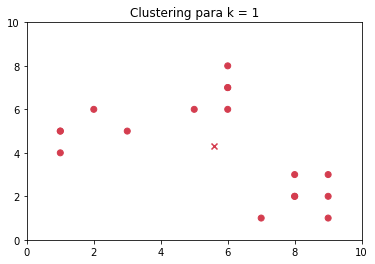

* Para k =  2  el promedio de la silueta es de:  0.6113424368705715
   - Para i =  1  la silueta del cluster vale:  0.49704450958269375
   - Para i =  2  la silueta del cluster vale:  0.7746251901389686


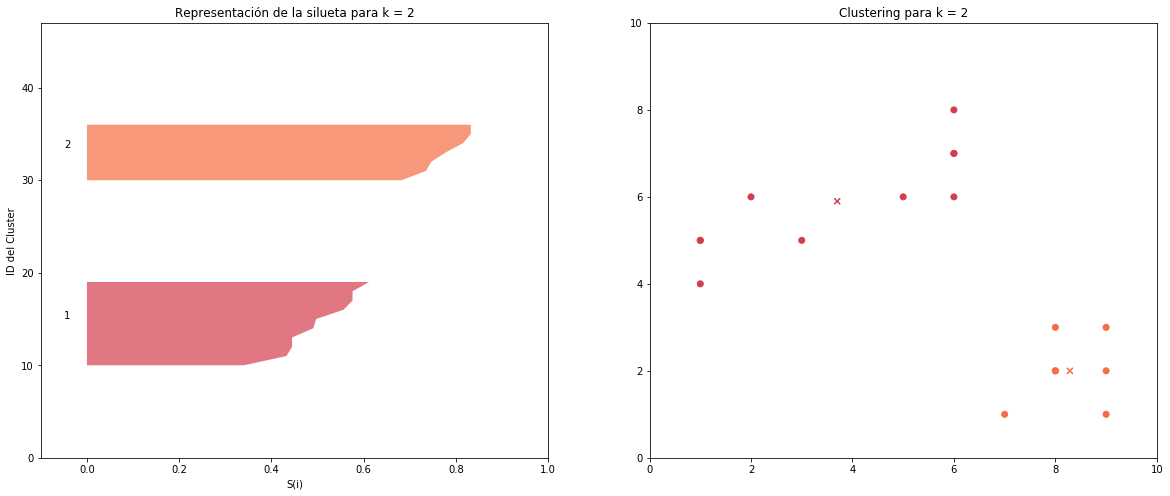

* Para k =  3  el promedio de la silueta es de:  0.7122079383287169
   - Para i =  1  la silueta del cluster vale:  0.6609508863896014
   - Para i =  2  la silueta del cluster vale:  0.7345257364682265
   - Para i =  3  la silueta del cluster vale:  0.7322200728725188


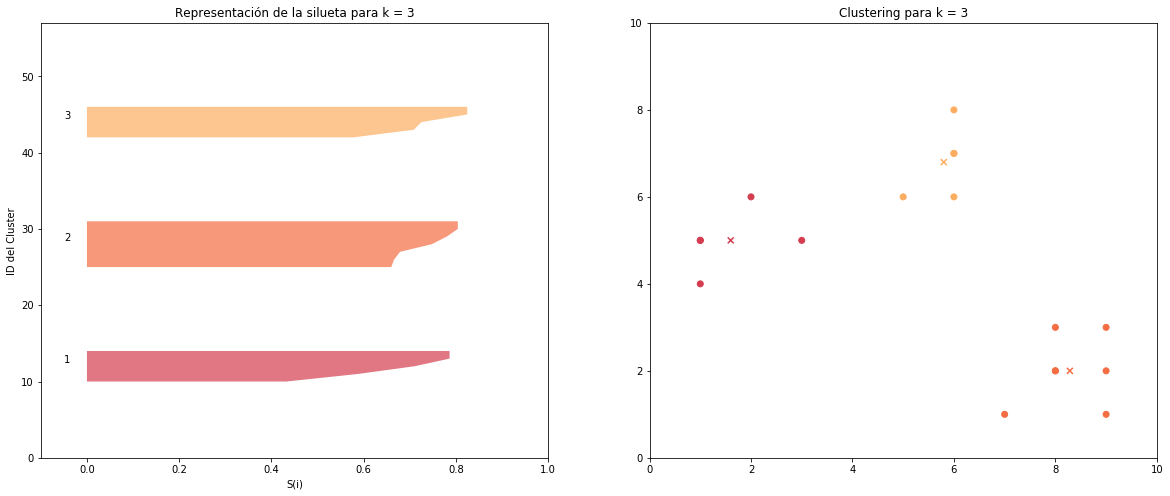

* Para k =  4  el promedio de la silueta es de:  0.6389948643127632
   - Para i =  1  la silueta del cluster vale:  0.24096929517637128
   - Para i =  2  la silueta del cluster vale:  0.7345257364682265
   - Para i =  3  la silueta del cluster vale:  0.654458796162702
   - Para i =  4  la silueta del cluster vale:  0.655666655624379


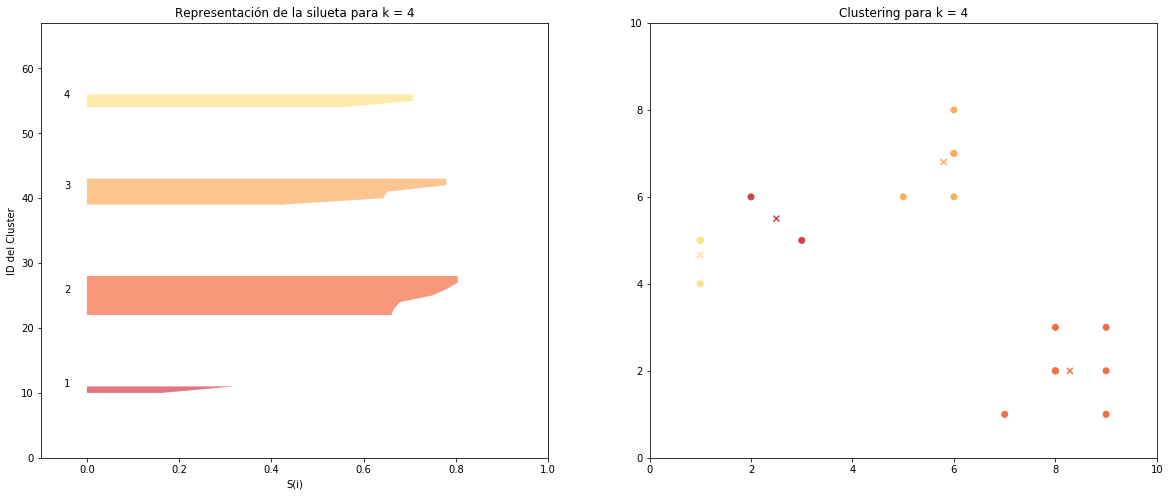

* Para k =  5  el promedio de la silueta es de:  0.46983374375750137
   - Para i =  1  la silueta del cluster vale:  0.655666655624379
   - Para i =  2  la silueta del cluster vale:  0.37765685097302226
   - Para i =  3  la silueta del cluster vale:  0.654458796162702
   - Para i =  4  la silueta del cluster vale:  0.24096929517637128
   - Para i =  5  la silueta del cluster vale:  0.0


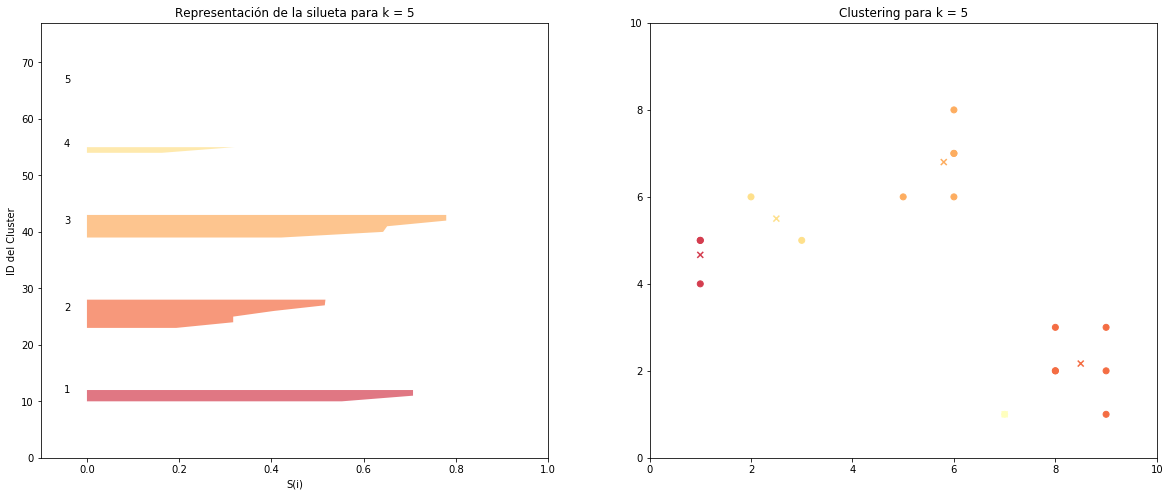

* Para k =  6  el promedio de la silueta es de:  0.4421681922609326
   - Para i =  1  la silueta del cluster vale:  0.654458796162702
   - Para i =  2  la silueta del cluster vale:  0.263812295212263
   - Para i =  3  la silueta del cluster vale:  0.655666655624379
   - Para i =  4  la silueta del cluster vale:  0.31700053499298475
   - Para i =  5  la silueta del cluster vale:  0.24096929517637128
   - Para i =  6  la silueta del cluster vale:  0.0


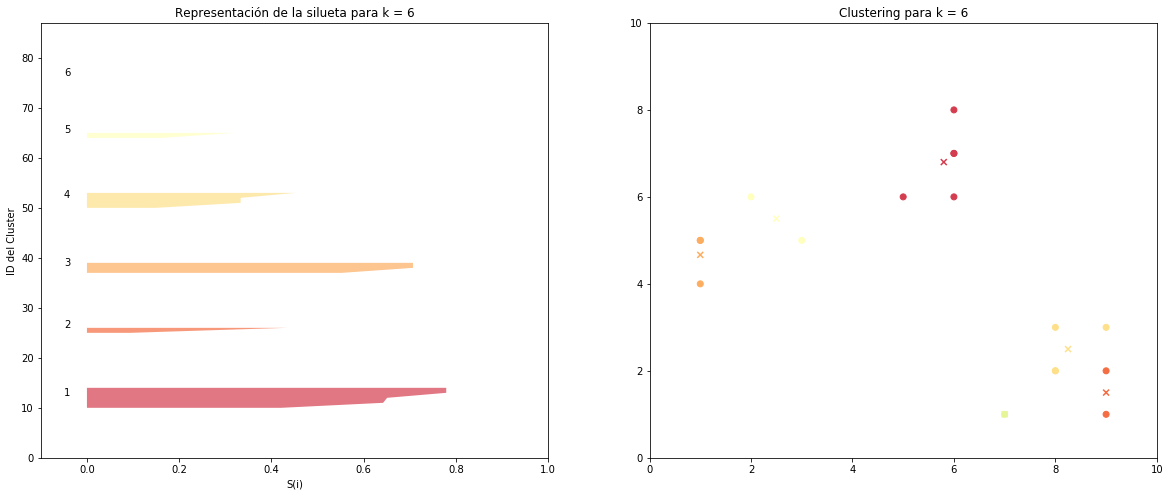

* Para k =  7  el promedio de la silueta es de:  0.3889390504750796
   - Para i =  1  la silueta del cluster vale:  0.30004208861569454
   - Para i =  2  la silueta del cluster vale:  0.32882042637679976
   - Para i =  3  la silueta del cluster vale:  0.655666655624379
   - Para i =  4  la silueta del cluster vale:  0.5664789734180768
   - Para i =  5  la silueta del cluster vale:  0.0
   - Para i =  6  la silueta del cluster vale:  0.24096929517637128
   - Para i =  7  la silueta del cluster vale:  0.3028895866899326


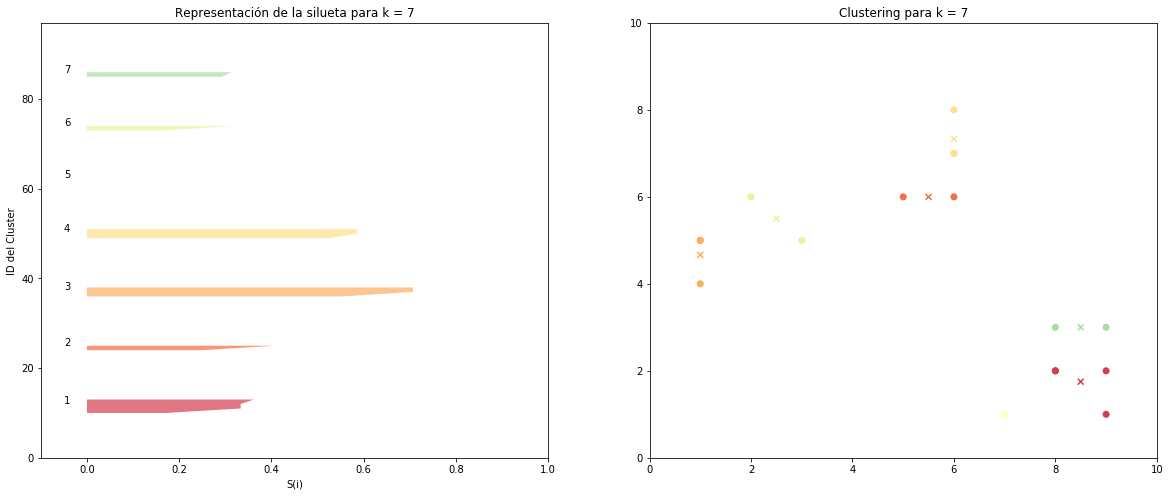

* Para k =  8  el promedio de la silueta es de:  0.35284612510104646
   - Para i =  1  la silueta del cluster vale:  0.31700053499298475
   - Para i =  2  la silueta del cluster vale:  0.6152265411044983
   - Para i =  3  la silueta del cluster vale:  0.5664789734180768
   - Para i =  4  la silueta del cluster vale:  0.263812295212263
   - Para i =  5  la silueta del cluster vale:  0.0
   - Para i =  6  la silueta del cluster vale:  0.0
   - Para i =  7  la silueta del cluster vale:  0.32882042637679976
   - Para i =  8  la silueta del cluster vale:  0.0


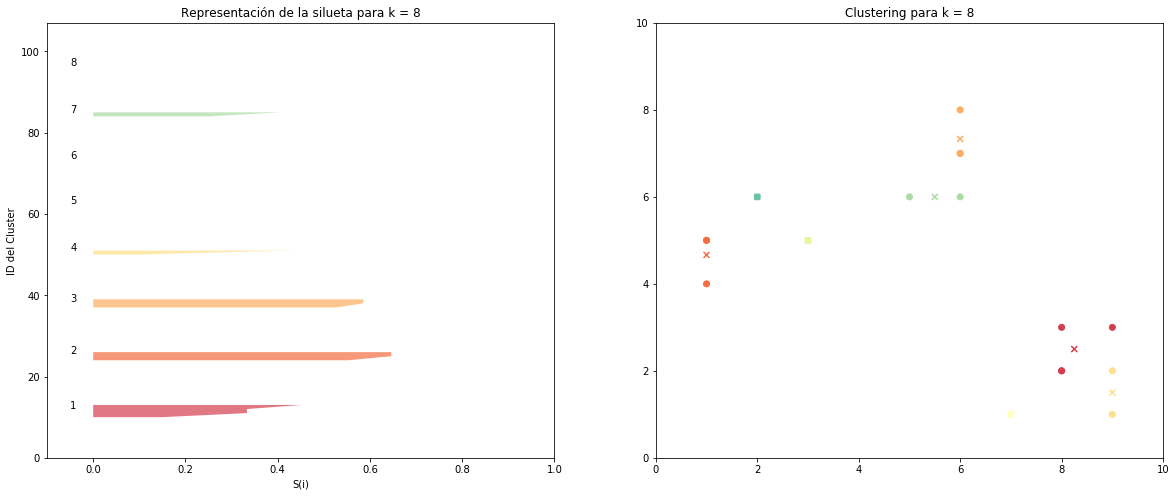

* Para k =  9  el promedio de la silueta es de:  0.34011594848992555
   - Para i =  1  la silueta del cluster vale:  0.39052429175126996
   - Para i =  2  la silueta del cluster vale:  0.32882042637679976
   - Para i =  3  la silueta del cluster vale:  0.6152265411044983
   - Para i =  4  la silueta del cluster vale:  0.0
   - Para i =  5  la silueta del cluster vale:  0.5664789734180768
   - Para i =  6  la silueta del cluster vale:  0.0
   - Para i =  7  la silueta del cluster vale:  0.20382042637679978
   - Para i =  8  la silueta del cluster vale:  0.0
   - Para i =  9  la silueta del cluster vale:  0.0


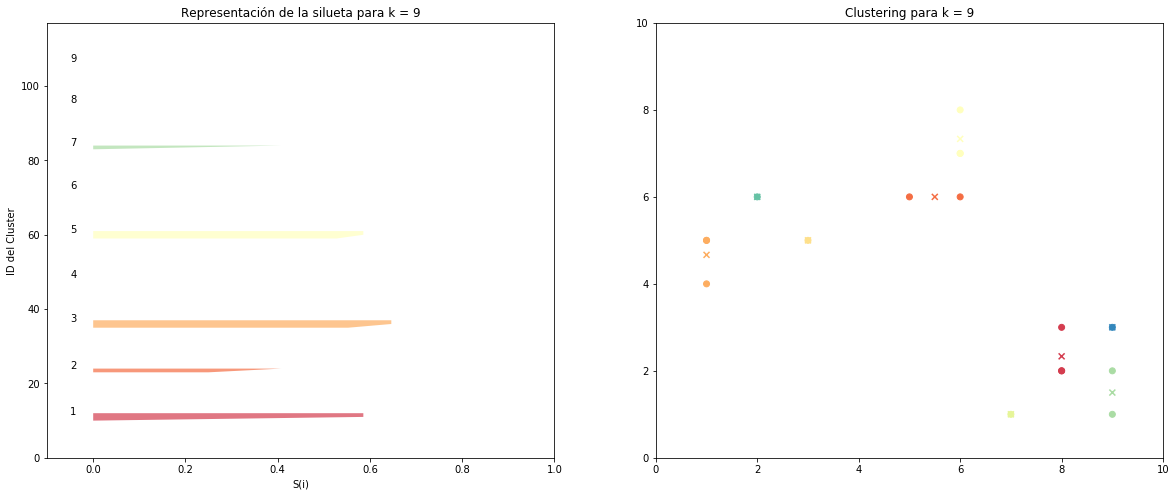

In [34]:
max_k = 10  ## Máximo número de clusters a crear
K = range(1,max_k)
ssw = []

##cmap = cm.get_cmap("Spectral") 
##color_palette = [cmap(float(i)/max_k) for i in K]

color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))  ##Mide la distancia de cada uno a cada
                                                                                        ##varicentro o centroide
    ssw.append(ssw_k)  ##Añadimos el valor de cada elemento a un vector

    label_color = [color_palette[i] for i in labels]
    
    ## Fabricar la silueta para cada cluster
    ## No hacemos silueta si K=1 o K=len(x)
    if 1<k<len(X):
            ## Crear un subplot de una fila y dos columnas
        fig,(axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        # EL primer subplot contendrá  la silueta que puede tener valores desde -1 a 1
        # En nuestro caso, ya controlamos que los valores están entre -1 y 1
        axis1.set_xlim([-0.1, 1])
        
        ## El numero de clusters a insertar determinará el tamaño de cada barra
        ## El coeficiente(n_clusters+1)*10 será el espacio en blanco que dejaremos entre
        # siluetas individuales de cada cluster para separarlas
        axis1.set_ylim([0, len(X)+(k+1)*10])
        
    ## La función "silhouette_score(X,tags)" arroja el promedio de silueta de cada k cluster
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ", k, " el promedio de la silueta es de: ", silhouette_avg)
   
    ## La función "silhouette_samples(X, tags)" arroja el valor de silueta de cada uno de los datos de X
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            ## Agregamos la silueta del cluster iésimo. 
            
            #Separamos las siluetas de los valores del cluster i, sólo seleccionando los valores que tienen un tag = cluster i
            ith_cluster_sv = sample_silhouette_values[labels==i]
            print("   - Para i = ", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            
            #Ordenamos descendientemente las siluetas del cluster iésimo
            ith_cluster_sv.sort()
            
            #Calculamos donde colocar la primera silueta en el eje vertical (y)
            ith_cluster_size = ith_cluster_sv.shape[0] ## El número de filas
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster de la paleta que tiene k colores
            color = color_palette[i]
            
            #Pintamos la silueta del cluster iésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                                          0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5*ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 ## Dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ## Fin de la representación de la silueta
    ## Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s" %str(k))
    plt.scatter(x1, x2, c = label_color)
    plt.scatter(centers[0], centers[1], c = color_palette[0:len(centers)], marker = "x")
    plt.show()

Text(0.5, 1.0, 'Técnica del codo para cada k')

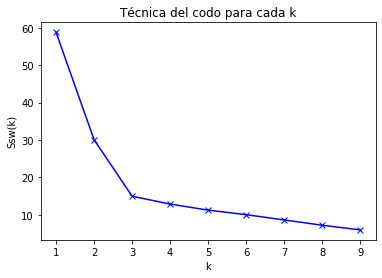

In [37]:
## Representación del codo usando el ssw (suma total de los cuadrados internos de distancia de cada punto)
plt.plot (K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("Ssw(k)")
plt.title("Técnica del codo para cada k")

Text(0.5, 1.0, 'Técnica del codo normalizada para cada k')

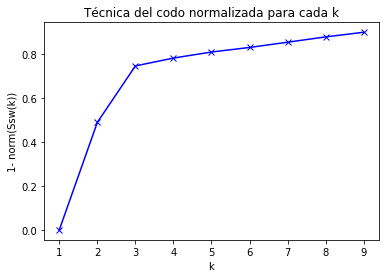

In [38]:
## Representación del codo normalizado
plt.plot(K, 1 - (ssw/sst), "bx-")
plt.xlabel("k")
plt.ylabel("1- norm(Ssw(k))")
plt.title("Técnica del codo normalizada para cada k")